# Disco de Acreción alrededor del agujero negro de Schwarzschild

En este cuadernillo de Jupyter estudiamos el disco de acreción alrededor de una agujero de Schwarzschild, los resultados se obtienen de manera analítica y numérica. 

### Órbitas circulares en espaciotiempo estático con simetría esférica.

Para el estudio del disco de acreción necesitamos determinar las óribitas circulares que siguen las particulas masivas alrededor del agujero negro, para esto iniciammos con la ecuación geodésica. Consideramos un espacio estático, simétricamente esférico descrito por la siguiente métrica,

\begin{equation}
ds^2=-f(r)dt^2+\frac{dr^2}{h(r)}+r^2d\theta^2+r^2\sin{(\theta)}^2d\phi^2.
\end{equation}

El lagrangiano para una particula de prueba tiene la forma $\mathcal{L}=1/2g_{\mu\nu}\dot{x}^{\mu}\dot{x}^{\nu}$, que al considerar que estas se mueven en el plano ecuatorial, es decir $\theta=\pi/2$, se explicitamente la forma siguiente

\begin{equation}
\mathcal{L}=\frac{1}{2}\left[-f(r)\dot{t}^2+\frac{\dot{r}^2}{h(r)}+r^2\dot{\phi}^2\right].
\end{equation}

Debido a que el lagrangiano anterior no depende explicitamente de las coordenadas $t$ y $\phi$, estas se conocen como coordenadas cíclicas, estas determinan cantidades conservadas las cuales son la energía y el momento angular, respectivamente. 

\begin{equation}
\mathcal{E}=f(r)\dot{t},\qquad\mathcal{l}=r^{2}\dot{\phi}.
\end{equation}

Mediante las ecuaciones de Euler-Lagrange obtenemos la ecuación para la coordenada $r$ y la podemos escribir como 

\begin{equation}
\dot{r}^2=\frac{h(r)}{f(r)}\mathcal{E}^2-h(r)\left(\frac{\mathcal{l^2}}{r^2}+1\right),
\end{equation}

donde podemos definir un potencial efectivo $V_{eff}(r)^2=h(r)\left(\frac{\mathcal{l^2}}{r^2}+1\right)$. Para considerar solo orbitas circulares se deben cumplir las condiciones de $\dot{r}=0$ y $d\dot{r}/dr=0$, esto implica que 

\begin{equation}
\mathcal{E}^2=\frac{2f^2}{2f-f'r},\qquad\mathcal{l}^2=\frac{f'r^3}{2f-f'r}.
\end{equation}

También se requiere determinar la velocidad angular de las particulas de prueba que está dado por la expresión, 

\begin{equation}
\Omega=\frac{\dot{\phi}}{\dot{t}}=\sqrt{\frac{f'}{2r}}.
\end{equation}


### Órbitas circulares para el agujero negro de Schwarzschild

El agujero negro de Schwarzschild está definido por las funciones métricas 

\begin{equation}
f(r) = h(r) = 1-\frac{2GM}{c^2r},  
\end{equation}

Por simplicidad vamos a definir las siguientes cantidades, $r_{g}=\frac{GM}{c^2}$ y $x=\frac{r}{r_{g}}$, con lo que la solución de Schwarzschild se escribe como 

\begin{equation}
f(r) = h(r) = 1-\frac{2}{x},  
\end{equation}

Para probar que la solución analítica y la solución numérica son iguales vamos a graficar las funciones métricas y sus derivadas. 

In [1]:
# Librerías numéricas y de graficación necesarias

import numpy as np
from scipy import optimize
from scipy import integrate
import matplotlib.pyplot as plt
from matplotlib import patheffects
from matplotlib.text import OffsetFrom

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Valores Físicos                        
Ms    = 1.988e+33                        # g                           MASA DEL SOL
M     = 14.8*Ms                          # Msol (g)                    MASA DEL AGUJERO NEGRO
Mp    = 0.472e+19                        # g/s^{-1}                    RAZÓN DE ACRECCIÓN
h     = 6.6256e-27                       # erg s                       CONSTANTE DE PLANCK 
k     = 1.3805e-16                       # erg K^{-1}                  CONSTANTE DE BOLTZMANN
theta = 1/3*np.pi                        # radianes                    ÁNGULO DE INCLINACIÓN DEL DISCO
sigma = 5.67e-5                          # erg s^{-1} cm^{-2} K^{-4}   CONSTANTE DE STEFAN-BOLTZMANN
c     = 3e10                             # cm/s                        VELOCIDAD DE LA LUZ
G     = 6.674e-8                         # cm^{3}g^{-1}s^{-2}          CONSTANTE UNIVERSAL DE GRAVITACION
#ri    = 6                                #                             RADIO DEL ISCO (PUNTO INICIAL DEL DISCO)  
rf    = 50                               #                             PUNTO FINAL DEL DISCO 
nu    = np.linspace(1e+10, 1e+18, 1000)  #                             FRECUENCIA 
rg    = G*M/c**2                         #

In [3]:
# Definimos el intervalo en el eje horizontal para realizar las gráficas y la función métrica. 

x = np.linspace(0.0, 60.0, 10000 )

# Definimos la función métrica y sus derivadas.

def f(x):
    F = 1. - 2. / x
    return F

def df(x):
    F = 2. / x**2
    return F

def ddf(x):
    F = - 4. / x**3
    return F

fsch   = f(x)
dfsch  = df(x)
ddfsch = ddf(x)

# Aunque para Schwarzschild sabemos que f(x)=h(x), vamos a considerar un caso en el que no son iguales. 

def h(x):
    F = 1. - 2. / x
    return F

def dh(x):
    F = 2. / x**2
    return F

def ddh(x):
    F = - 4. / x**3
    return F

fsch   = h(x)
dfsch  = dh(x)
ddfsch = ddh(x)


In [4]:
# Importamos la función métrica y sus derivadas de la solución numérica para Schwarzschild

R       = np.loadtxt( 'R.txt' )
fschN   = np.loadtxt( 'SchN.txt' )
dfschN  = np.loadtxt( 'DSchN.txt' )
ddfschN = np.loadtxt( 'DDSchN.txt' )

# Volvemos a importar los datos como si las funciones f(x) y h(x) fueran distintas. 

hschN   = np.loadtxt( 'SchN.txt' )
dhschN  = np.loadtxt( 'DSchN.txt' )
ddhschN = np.loadtxt( 'DDSchN.txt' )

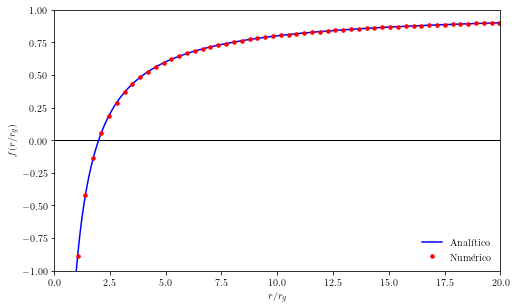

In [5]:
#GRAFICA DE LA FUNCIÓN MÉTRICA PARA Schwarzschild.

#Paquetes para escritura tipo Latex
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

#Tamaño de la gráfica y creación de la gráfica.

fig, ax = plt.subplots(figsize = (8.0, 4.8), sharex=False, sharey=False)

ax.hlines( 0.0, 0.0, 40.00, color = 'black', linewidth = 1.0 )

ax.plot( x,       fsch,        "-" , markersize = 3.5, label = r"Analítico", linewidth = 1.5, color = "blue"  )
ax.plot( R[::35], fschN[::35], "o",  markersize = 3.5, label = r"Numérico",  linewidth = 1.5, color = "red" )

plt.xlabel(r'$r/r_{g}$')
plt.ylabel(r'$f(r/r_{g})$')

plt.xlim( 0.00,  20.0 )
plt.ylim( -1.00, 1.00 )

plt.legend(loc='lower right', frameon=False)

plt.show()

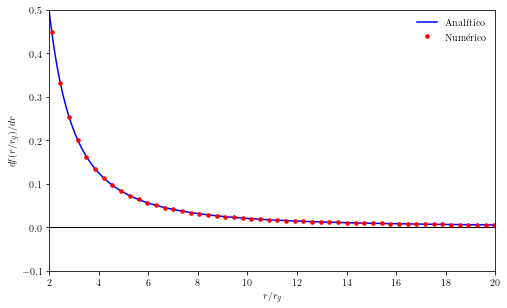

In [6]:
#GRAFICA DE LA PRIMERA DERIADA FUNCIÓN MÉTRICA PARA Schwarzschild.

#Paquetes para escritura tipo Latex
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

#Tamaño de la gráfica y creación de la gráfica.

fig, ax = plt.subplots(figsize = (8.0, 4.8), sharex=False, sharey=False)

ax.hlines( 0.0, 0.0, 40.00, color = 'black', linewidth = 1.0 )

ax.plot( x,       dfsch,        "-" , markersize = 3.5, label = r"Analítico", linewidth = 1.5, color = "blue"  )
ax.plot( R[::35], dfschN[::35], "o",  markersize = 3.5, label = r"Numérico",  linewidth = 1.5, color = "red" )

plt.xlabel(r'$r/r_{g}$')
plt.ylabel(r'$df(r/r_{g})/dr$')

plt.xlim( 2.00,  20.0 )
plt.ylim( -0.10, 0.50 )

plt.legend(loc='upper right', frameon=False)

plt.show()

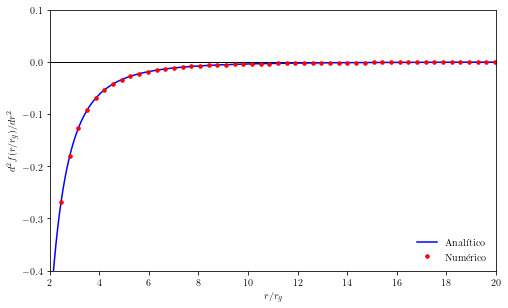

In [7]:
#GRAFICA DE LA SEGUNDA DERIADA FUNCIÓN MÉTRICA PARA Schwarzschild.

#Paquetes para escritura tipo Latex
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

#Tamaño de la gráfica y creación de la gráfica.

fig, ax = plt.subplots(figsize = (8.0, 4.8), sharex=False, sharey=False)

ax.hlines( 0.0, 0.0, 40.00, color = 'black', linewidth = 1.0 )

ax.plot( x,       ddfsch,        "-" , markersize = 3.5, label = r"Analítico", linewidth = 1.5, color = "blue"  )
ax.plot( R[::35], ddfschN[::35], "o",  markersize = 3.5, label = r"Numérico",  linewidth = 1.5, color = "red" )

plt.xlabel(r'$r/r_{g}$')
plt.ylabel(r'$d^2f(r/r_{g})/dr^2$')

plt.xlim( 2.00,  20.0 )
plt.ylim( -0.40, 0.10 )

plt.legend(loc='lower right', frameon=False)

plt.show()

## Movimiento de Particulas de Prueba.

### Energía de particulas de prueba, 

Ahora vamos a gráficar la energía de la particula de prueba para comprobar que los pasos intermedios son correctos. Recordemos que la energía está dada por la expresión 

\begin{equation}
\mathcal{E}^{2}=\frac{2f^{2}}{2f-rf'}
\end{equation}

In [8]:
# Definimos la energía de la particula de prueba para la solución analítica. 

def E(x):
    F = np.sqrt( 2*f(x)**2 / ( 2*f(x)-x*df(x) ) )
    return F

Esch = E(x)

In [9]:
# Definimos la energía de la particula de prueba para la solución numérica. 

EschN = np.sqrt( 2*fschN**2 / ( 2*fschN - R*dfschN ) )

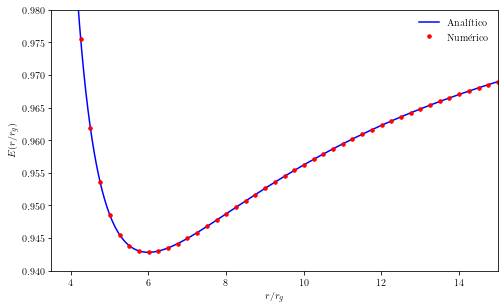

In [10]:
#GRAFICA DE LA ENERGÍA DE LA PARTICULA MASIVA DE PRUEBA ALREDEDOR DEL AGUJERO NEGRO DE Schwarzschild.

#Paquetes para escritura tipo Latex
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

#Tamaño de la gráfica y creación de la gráfica.

fig, ax = plt.subplots(figsize = (8.0, 4.8), sharex=False, sharey=False)

ax.hlines( 0.0, 0.0, 60.00, color = 'black', linewidth = 1.0 )

ax.plot( x,       Esch,        "-" , markersize = 3.5, label = r"Analítico", linewidth = 1.5, color = "blue"  )
ax.plot( R[::25], EschN[::25], "o",  markersize = 3.5, label = r"Numérico",  linewidth = 1.5, color = "red" )

plt.xlabel(r'$r/r_{g}$')
plt.ylabel(r'$E(r/r_{g})$')

plt.xlim( 3.50, 15.0 )
plt.ylim( 0.94, 0.98 )

plt.legend(loc='upper right', frameon=False)

plt.show()

### Momento angular de particulas de prueba, 

Ahora vamos a gráficar el momento angular  de la particula de prueba para comprobar que los pasos intermedios son correctos. Recordemos que la energía está dada por la expresión 

\begin{equation}
\mathcal{l}^{2}=\frac{r^{3}f'}{2f-rf'}
\end{equation}


In [11]:
# Definimos el momento angular de la particula de prueba para la solución analítica. 

def ml(x):
    F = np.sqrt( x**3.*df(x) / (  2.*f(x)-x*df(x) ) )
    return F

mlsch = ml(x)

In [12]:
# Definimos el momento angular de la particula de prueba para la solución numérica. 

lschN = np.sqrt( R**3*dfschN / ( 2*fschN - R*dfschN ) )

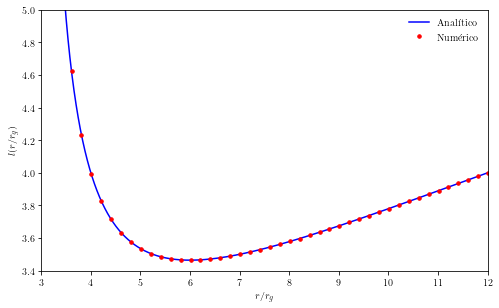

In [13]:
#GRAFICA DEL MOMENTO ANGULAR DE LA PARTICULA MASIVA DE PRUEBA ALREDEDOR DEL AGUJERO NEGRO DE Schwarzschild.

#Paquetes para escritura tipo Latex
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

#Tamaño de la gráfica y creación de la gráfica.

fig, ax = plt.subplots(figsize = (8.0, 4.8), sharex=False, sharey=False)

ax.hlines( 0.0, 0.0, 60.00, color = 'black', linewidth = 1.0 )

ax.plot( x,       mlsch,        "-" , markersize = 3.5, label = r"Analítico", linewidth = 1.5, color = "blue"  )
ax.plot( R[::20], lschN[::20], "o",  markersize = 3.5, label = r"Numérico",  linewidth = 1.5, color = "red" )

plt.xlabel(r'$r/r_{g}$')
plt.ylabel(r'$l(r/r_{g})$')

plt.xlim( 3.00, 12.0 )
plt.ylim( 3.40, 5.00 )

plt.legend(loc='upper right', frameon=False)

plt.show()

### Velocidad Angular de la particula de prueba 

Ahora vamos a gráficar la velocidad angular de la particula de prueba para comprobar que los pasos intermedios son correctos. Recordemos que la energía está dada por la expresión 

\begin{equation}
\Omega=\sqrt{\frac{f'}{2r}}
\end{equation}


In [14]:
# Definimos la velocidad angular de la particula de prueba para la solución analítica. 

def O(x):
    F = np.sqrt( df(x) / ( 2*x ) )
    return F

Osch = O(x)

In [15]:
# Definimos la energía de la particula de prueba para la solución numérica. 

OschN = np.sqrt( dfschN / ( 2*R ) )

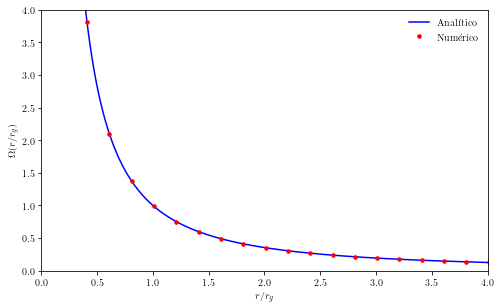

In [16]:
#GRAFICA DE LA VELOCIDAD ANGULAR DE LA PARTICULA MASIVA DE PRUEBA ALREDEDOR DEL AGUJERO NEGRO DE Schwarzschild.

#Paquetes para escritura tipo Latex
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

#Tamaño de la gráfica y creación de la gráfica.

fig, ax = plt.subplots(figsize = (8.0, 4.8), sharex=False, sharey=False)

ax.hlines( -1.0, -1.0, 60.00, color = 'black', linewidth = 1.0 )

ax.plot( x,       Osch,        "-" , markersize = 3.5, label = r"Analítico", linewidth = 1.5, color = "blue"  )
ax.plot( R[::20], OschN[::20], "o",  markersize = 3.5, label = r"Numérico",  linewidth = 1.5, color = "red" )

plt.xlabel(r'$r/r_{g}$')
plt.ylabel(r'$\Omega(r/r_{g})$')

plt.xlim( 0.00, 4.00 )
plt.ylim( 0.00, 4.00 )

plt.legend(loc='upper right', frameon=False)

plt.show()

## Potencial Efectivo de la particula de prueba y su segunda derivada 

Sabemos que el potencial efectivo lo podemos escribir como $V_{eff}=f(r)\left(1+\frac{l^2}{r^2}\right)$, y su segunda derivada la expresamos como,

\begin{equation}
V''_{eff}=\frac{6ff'-4rf'^2+2rff''}{2rf-r^2f'}=0,
\end{equation}

de esta condición podemos obtener el radio del ISCO.


In [17]:
# Definimos el potencial efectivo analítico y su segunda derivada

def V(x):
    F = f(x)*( 1 + l**2/x**2 )
    return F

def ddV(x):
    F = ( 6*f(x)*df(x) - 4*x*df(x)**2 + 2*x*f(x)*ddf(x) ) / ( 2*x*f(x) - x**2*df(x) )
    return F

# Valores numéricos para el momento angular. 

l = 4.5
Vsch   = V(x)
ddVsch = ddV(x)

In [18]:
# Definimos el potencial efectivo numérico y su segunda derivada

VefN   = fschN*( 1 + l**2/R**2 )
ddVefN = ( 6*fschN*dfschN - 4*R*dfschN**2 + 2*R*fschN*ddfschN ) / ( 2*R*fschN - R**2*dfschN )

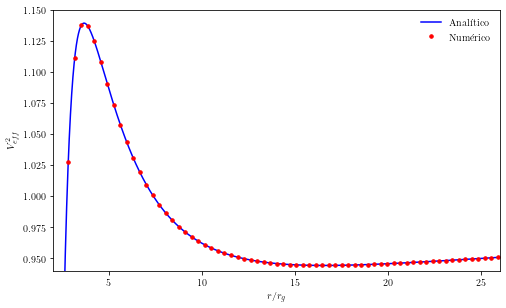

In [19]:
#GRAFICA DEL POTENCIAL EFECTIVO DE LA PARTICULA MASIVA DE PRUEBA ALREDEDOR DEL AGUJERO NEGRO DE Schwarzschild.

#Paquetes para escritura tipo Latex
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

#Tamaño de la gráfica y creación de la gráfica.

fig, ax = plt.subplots(figsize = (8.0, 4.8), sharex=False, sharey=False)

ax.hlines( 0.0, 0.0, 60.00, color = 'black', linewidth = 1.0 )

ax.plot( x,       Vsch,        "-" , markersize = 3.5, label = r"Analítico", linewidth = 1.5, color = "blue"  )
ax.plot( R[::35], VefN[::35],  "o",  markersize = 3.5, label = r"Numérico",  linewidth = 1.5, color = "red" )

plt.xlabel(r'$r/r_{g}$')
plt.ylabel(r'$V_{eff}^2$')

plt.xlim( 2.00, 26.00 )
plt.ylim( 0.94, 1.15 )

plt.legend(loc='upper right', frameon=False)

plt.show()

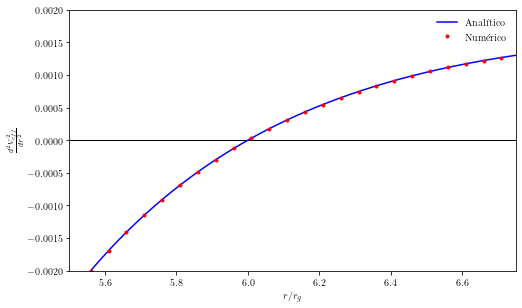

In [20]:
# GRAFICA DE LA SEGUNDA DERIVADA DEL POTENCIAL EFECTIVO DE LA PARTICULA MASIVA DE PRUEBA 
# ALREDEDOR DEL AGUJERO NEGRO DE Schwarzschild.

#Paquetes para escritura tipo Latex
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

#Tamaño de la gráfica y creación de la gráfica.

fig, ax = plt.subplots(figsize = (8.0, 4.8), sharex=False, sharey=False)

ax.hlines( 0.0, 0.0, 60.00, color = 'black', linewidth = 1.0 )

ax.plot( x,       ddVsch,        "-" , markersize = 3.5, label = r"Analítico", linewidth = 1.5, color = "blue"  )
ax.plot( R[::5], ddVefN[::5],  "o",  markersize = 3.0, label = r"Numérico",  linewidth = 0.5, color = "red" )

plt.xlabel(r'$r/r_{g}$')
plt.ylabel(r'$\frac{d^2V_{eff}^2}{dr^2}$')

plt.xlim( 5.50, 6.75 )
plt.ylim( -0.002, 0.002 )

plt.legend(loc='upper right', frameon=False)

plt.show()

In [21]:
# Localización del ISCO, para la solución analítica 

xin = 6.1 
ri  = optimize.newton( ddV, xin, fprime = None )
print( ri )

6.000000000000017


In [22]:
#Vint = ddVefN[599:5999]

## Propiedades físicas del disco de acreción 

Primeramente vamos a determinar la potencia por unidad de area la cual está dada por la siguiente expresión,

\begin{equation}
D(r) = \frac{\dot{M}}{4\pi r}\left(-\frac{d\Omega}{dr}\right)\frac{\sqrt{f(r)h(r)}}{\left(\mathcal{E}-\Omega\mathcal{l}\right)^{2}}\int_{r_{i}}^{r}{\left(\mathcal{E}-\Omega\mathcal{l}\right)\frac{d\mathcal{l}}{dr}}dr,
\end{equation}

donde $r_{i}$ es el radio del ISCO que en el caso del agujero negro de Schwarzschild es $r_{i}=6M$.

Para probar que todo funciona correctamente primero vamos a graficar el integrando y el factor que está afuera de la integral y posteriormente vamos a realizar la integral.

El integrando viene dado por, 

\begin{equation}
\left(\mathcal{E}-\Omega\mathcal{l}\right)\frac{d\mathcal{l}}{dr}
\end{equation}

In [23]:
# Definimos la derivada del momento angular

def dl(x):
    F = ( -2.*x*df(x)**2. + f(x)*( 3.*df(x)+x*ddf(x) ) ) / ( 2*f(x) - x*df(x) )**(3./2.)
    return F

dlsch = dl(x)


In [24]:
# Definimos la derivada del momento angular numérica 

dlN = ( -2.*R*dfschN**2. + fschN*( 3.*dfschN+R*ddfschN ) ) / ( 2*fschN - R*dfschN )**(3./2.)

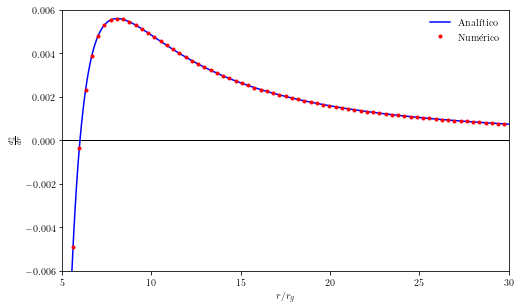

In [25]:
# GRAFICA DE LA DERIVADA DEL MOMENTO ANGULAR DE LA PARTICULA. 

#Paquetes para escritura tipo Latex
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')
        
#Tamaño de la gráfica y creación de la gráfica.
      
fig, ax = plt.subplots(figsize = (8.0, 4.8), sharex=False, sharey=False)

ax.hlines( 0.0, 0.0, 60.00, color = 'black', linewidth = 1.0 )

ax.plot( x,      dlsch,        "-" , markersize = 3.5, label = r"Analítico", linewidth = 1.5, color = "blue"  )
ax.plot( R[::35], dlN[::35],  "o",  markersize = 3.0, label = r"Numérico",  linewidth = 0.5, color = "red" )

plt.xlabel(r'$r/r_{g}$')
plt.ylabel(r'$\frac{d\mathcal{l}}{dr}$')

plt.xlim( 5.00, 30.00 )
plt.ylim( -0.006, 0.006 )

plt.legend(loc='upper right', frameon=False)

plt.show()

In [26]:
# Definimos el integrando analítico

def In(x):
    F = ( E(x) - O(x)*ml(x) ) * ( dl(x) )
    return F

Insch = In(x)


In [27]:
# Definimos el integrando numérico

InN = ( EschN - OschN*lschN ) * dlN
RcorN = R[599:5999]
IncorN = InN[599:5999]

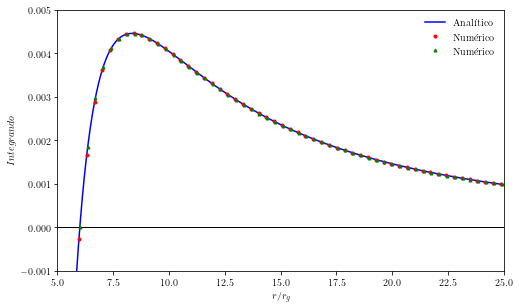

In [28]:
# GRAFICA DEL INTEGRANDO 

#Paquetes para escritura tipo Latex
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')
        
#Tamaño de la gráfica y creación de la gráfica.
      
fig, ax = plt.subplots(figsize = (8.0, 4.8), sharex=False, sharey=False)

ax.hlines( 0.0, 0.0, 60.00, color = 'black', linewidth = 1.0 )

ax.plot( x,      Insch,        "-" , markersize = 3.5, label = r"Analítico", linewidth = 1.5, color = "blue"  )
ax.plot( R[::35], InN[::35],  "o",  markersize = 3.0, label = r"Numérico",  linewidth = 0.5, color = "red" )
ax.plot( RcorN[::35], IncorN[::35],  "^",  markersize = 3.0, label = r"Numérico",  linewidth = 0.5, color = "green" )

plt.xlabel(r'$r/r_{g}$')
plt.ylabel(r'$Integrando$')

plt.xlim( 5.00, 25.00 )
plt.ylim( -0.001, 0.005 )

plt.legend(loc='upper right', frameon=False)

plt.show()

In [29]:
# Resultado analítico de la pura integral.

def RIn(x):
    F = np.sqrt(x) + np.sqrt(3) * np.arctanh(np.radians(np.sqrt(x/3))) - np.sqrt(6) - np.sqrt(3) * np.arctanh(np.radians(np.sqrt(6/3)))
    return F 

RInshc = RIn(x)

print( RIn(50) )

4.702440631308409


In [30]:
# Resultado analítico de la integral adimensional

def RID(x):
    F  = np.sqrt(x) + np.sqrt(3)*np.arctanh( np.radians(np.sqrt(x/3)) ) - np.sqrt(6) - np.sqrt(3)*np.arctanh( np.radians(np.sqrt(6/3)) )
    return F

x1 = np.linspace(6.00, 60.0, 10000 )

RIDS = RID(x1)

In [31]:
RcorN = R[599:5999]
IncorN = InN[599:5999]

RInN = integrate.cumulative_trapezoid( IncorN, RcorN, initial = 0)


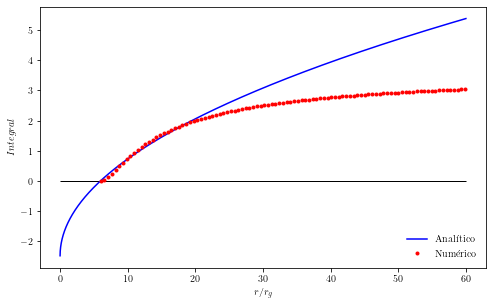

In [32]:
# GRAFICA DE LA INTEGRAL DE LA POTENCIA POR UNIDAD DE ÁREA. 

#Paquetes para escritura tipo Latex
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')
        
#Tamaño de la gráfica y creación de la gráfica.
      
fig, ax = plt.subplots(figsize = (8.0, 4.8), sharex=False, sharey=False)

ax.hlines( 0.0, 0.0, 60.00, color = 'black', linewidth = 1.0 )

ax.plot( x,     RInshc,        "-" , markersize = 3.5, label = r"Analítico", linewidth = 1.5, color = "blue"  )
ax.plot( RcorN[::55], 50*RInN[::55],  "o",  markersize = 3.0, label = r"Numérico",  linewidth = 0.5, color = "red" )

plt.xlabel(r'$r/r_{g}$')
plt.ylabel(r'$Integral$')

#plt.xlim( 6.00, 25.00 )
#plt.ylim( -0.50, 3.50 )

plt.legend(loc='lower right', frameon=False)

plt.show()

In [33]:
RID(6)

1.1102230246251565e-16

In [34]:
# Definimos la potencia por unidad de área del disco de acreción para la solución analítica. 

def D(x):
    F = ( 3*Mp*c**2 / ( 8*np.pi*x**(7/2)*rg**2 ) ) * (1-3/x)**(-1) * ( np.sqrt(x) + np.sqrt(3) * np.arctan(np.sqrt(x/3)) - np.sqrt(ri) - np.sqrt(3) * np.arctan(np.sqrt(ri/3)) )
    return F

Dsch = D(x)

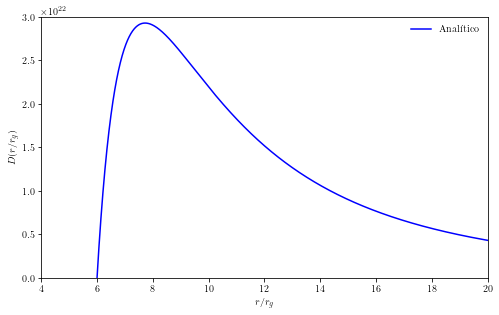

In [35]:
#GRAFICA DE LA POTENCIA POR UNIDAD DE ÁREA DEL DISCO DE ACRECIÓN ALREDEDOR DEL AGUJERO NEGRO DE Schwarzschild.

#Paquetes para escritura tipo Latex
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

#Tamaño de la gráfica y creación de la gráfica.

fig, ax = plt.subplots(figsize = (8.0, 4.8), sharex=False, sharey=False)

ax.hlines( -1.0, -1.0, 60.00, color = 'black', linewidth = 1.0 )

ax.plot( x,       Dsch/2,        "-" , markersize = 3.5, label = r"Analítico", linewidth = 1.5, color = "blue"  )
#ax.plot( R[::25], OschN[::25], "o",  markersize = 3.5, label = r"Numérico",  linewidth = 1.5, color = "red" )

ax.set_xlabel(r'$r/r_{g}$')
ax.set_ylabel(r'$D(r/r_{g})$')

plt.xlim(4.00, 20)
plt.ylim(0.00, 3.00e+22)

plt.legend(loc='upper right', frameon=False)

plt.show()